In [1]:
%matplotlib inline

import sys
import os
sys.path.append('C:/Users/samrari/ComputBuffer')

import numpy as np
import re

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import exposure, img_as_float, morphology
from skimage.measure import label
from PIL import Image

from osgeo import gdal
import osr
from my_packages.My_Geoprocess import*

def get_a(I, J):
    Cov_mat = np.cov(I,J, bias=1)
    return (Cov_mat[0,0] - Cov_mat[1,1]) / (2.0 * Cov_mat[0,1] )

def get_kikj(I, J):
    a = get_a(I, J)
    return a + (np.sqrt(a**2+1))

def get_dij_map(Xi, Xj, I, J):
    return Xi - (get_kikj(I, J) * Xj)

In [17]:
rasters_data_path = "C:/Users/samrari/ComputBuffer/Image/Sen2/S2A_OPER_PRD_MSIL1C_PDMC_20161101T012450_R101_V20161031T230902_20161031T230902.SAFE/GRANULE/S2A_OPER_MSI_L1C_TL_MPS__20161101T001337_A007105_T58KFA_N02.04/Deglinted/Valid/"
raster_data_path = [f for f in os.listdir(rasters_data_path) if f.endswith('.tif')]
bands_data = []

for f in range(len(raster_data_path)):
    raster_dataset = gdal.Open(rasters_data_path+raster_data_path[f], gdal.GA_ReadOnly)
    for b in range(1, raster_dataset.RasterCount+1):
        band = raster_dataset.GetRasterBand(b)
        bands_data.append(band.ReadAsArray())
        
        
for i in range(len(bands_data)):
    print(bands_data[i].shape)
bands_data = np.dstack(bands_data)
rows, cols, n_bands = bands_data.shape
print(bands_data.shape)

idx = np.array([3,2,1,0,4])
bands_data = bands_data[:,:,idx]

raster_dataset = gdal.Open(rasters_data_path+raster_data_path[0], gdal.GA_ReadOnly)
geo_transform = raster_dataset.GetGeoTransform()
proj = raster_dataset.GetProjectionRef()
del raster_dataset

(10980, 10980)
(10980, 10980)
(10980, 10980)
(10980, 10980)
(10980, 10980)
(10980, 10980, 5)


percentiles  5 ,  95  of band  0 :  535.0 ,  1851.0 

percentiles  5 ,  95  of band  1 :  767.0 ,  2391.0 

percentiles  5 ,  95  of band  2 :  596.0 ,  2261.0 

percentiles  5 ,  95  of band  3 :  387.0 ,  2261.0 

percentiles  5 ,  95  of band  4 :  440.0 ,  2436.0 



(-0.5, 10979.5, 10979.5, -0.5)

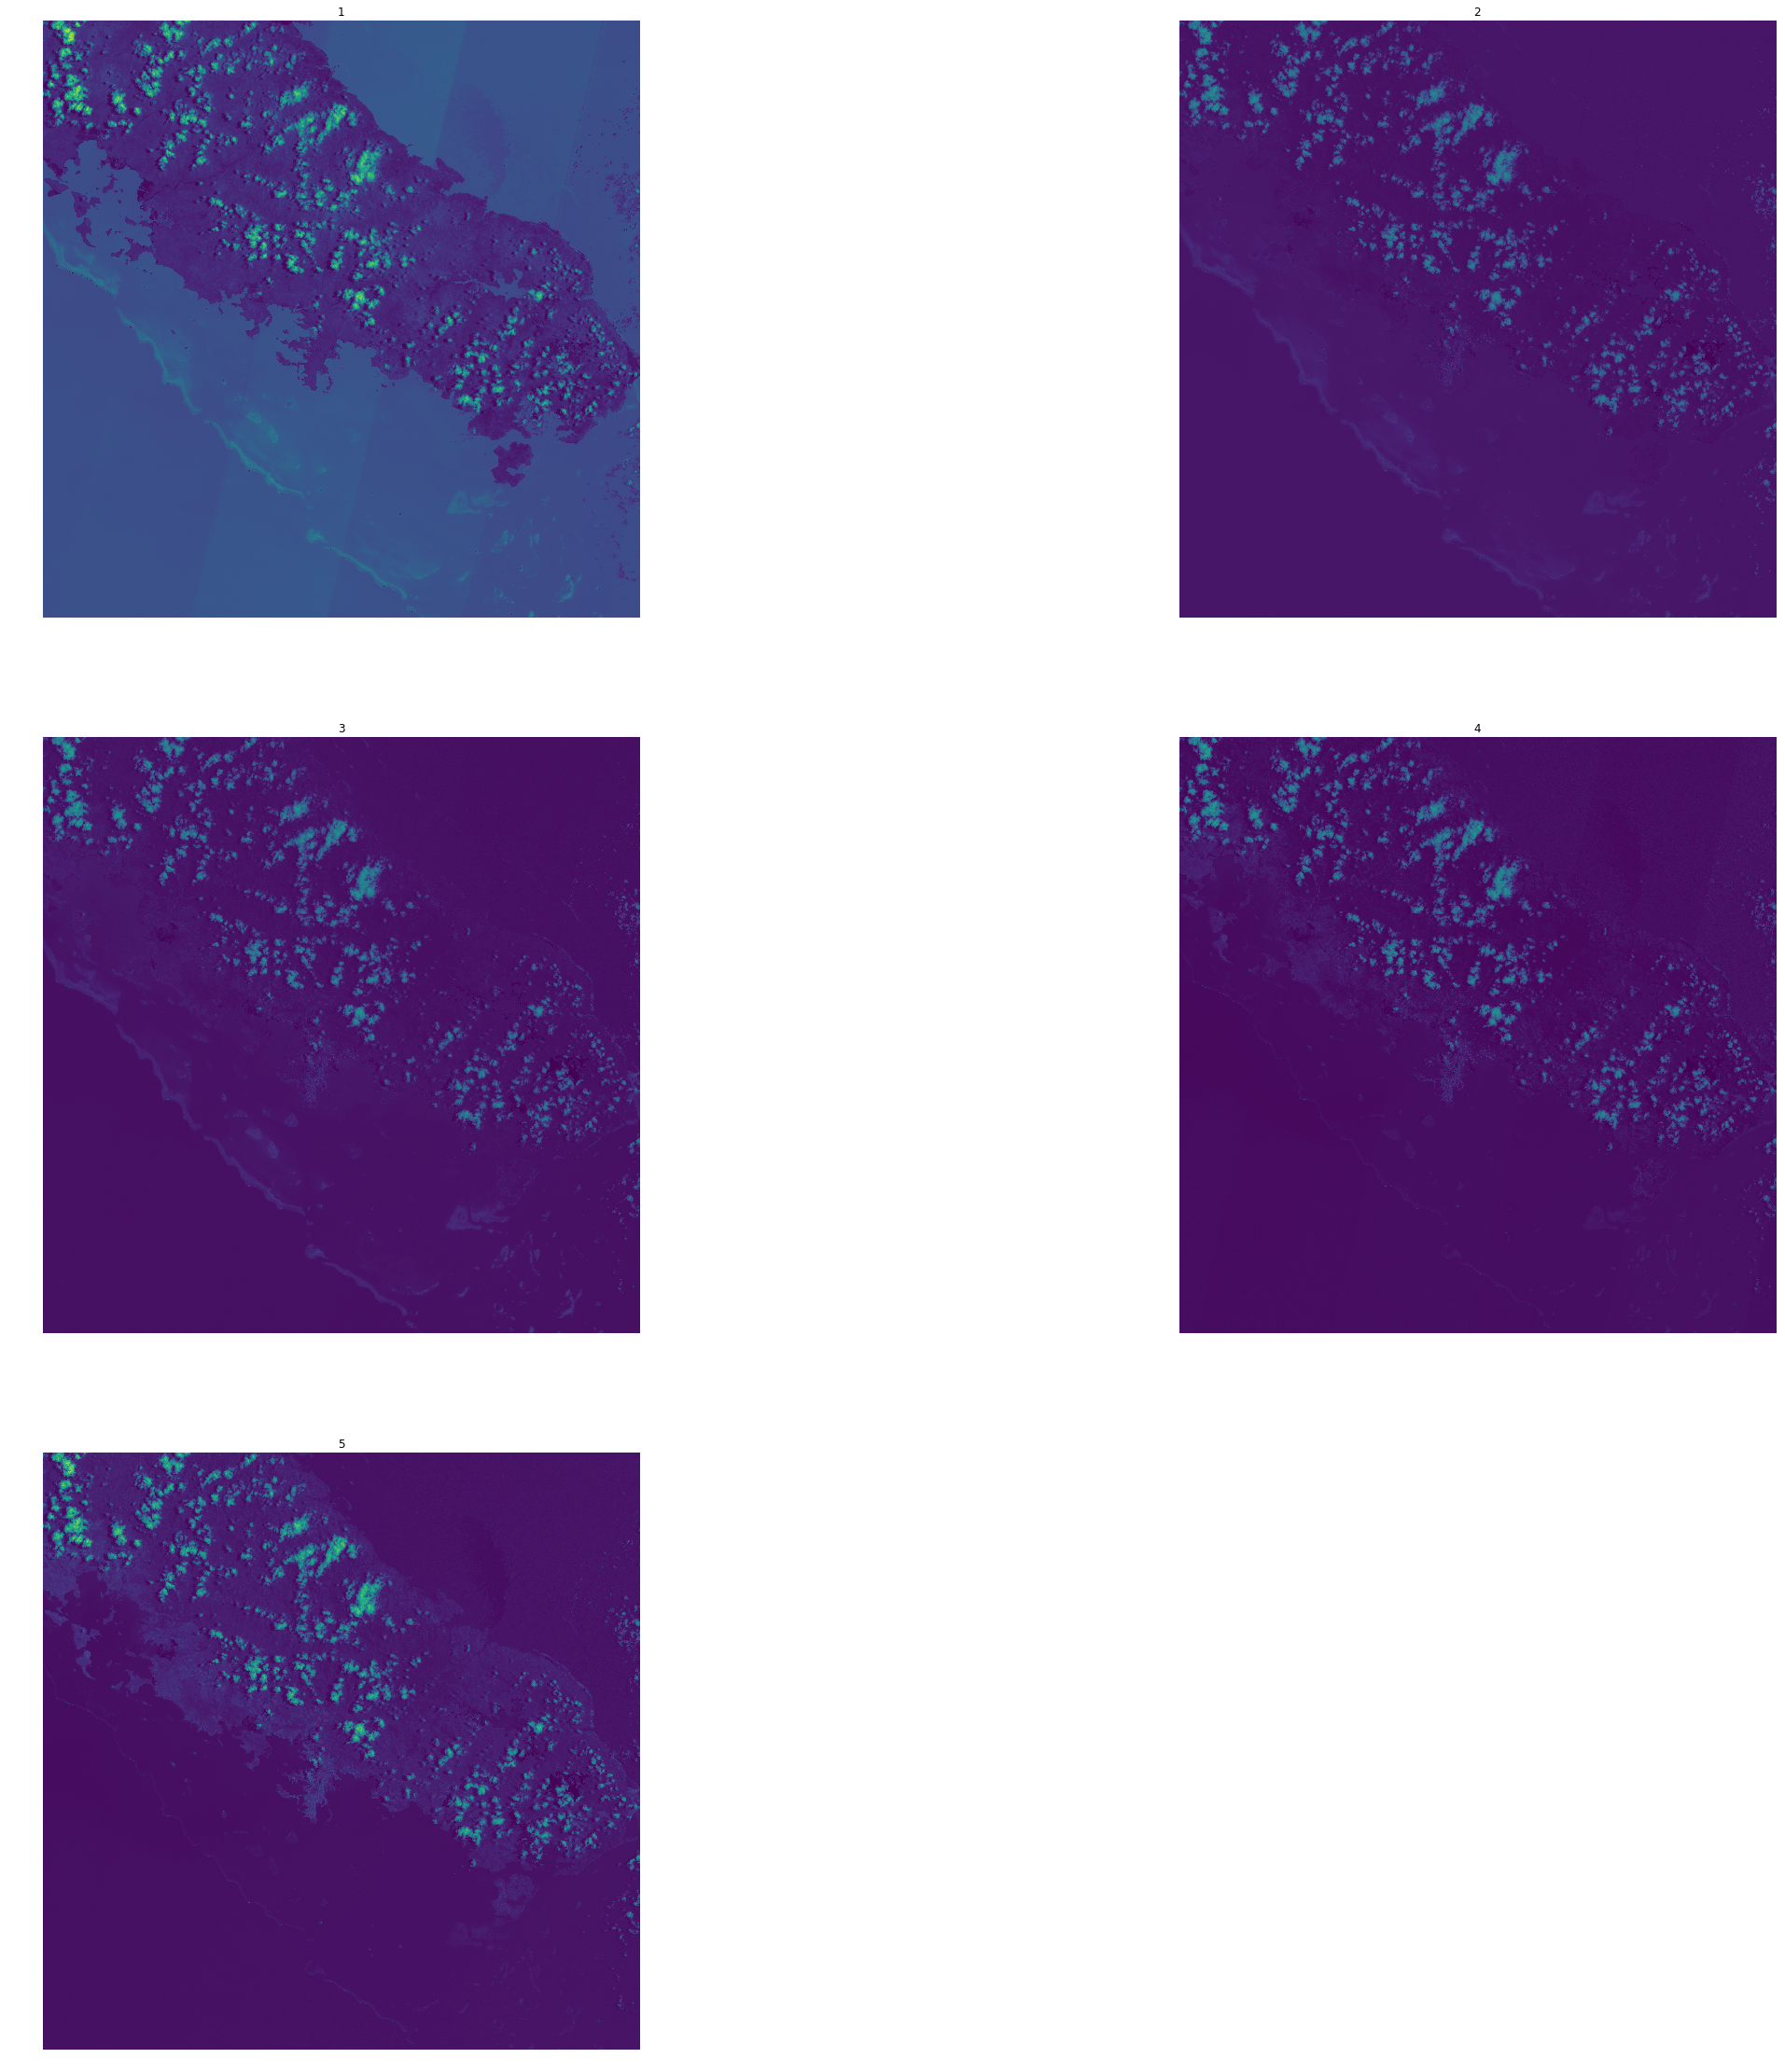

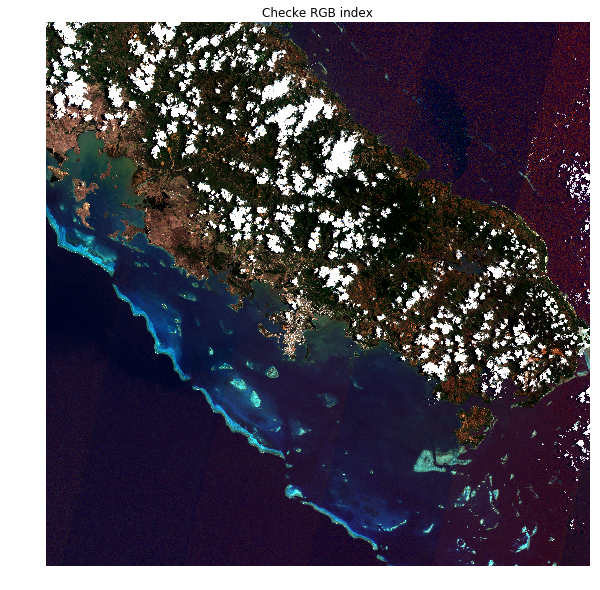

In [3]:
plt.figure(figsize=(40, 40))

for i in range(1,6):
    plt.subplot(3, 2, i)
    plt.imshow(img_as_float(bands_data[:,:,i-1]))
    plt.title(str(i))
    plt.axis('off')
    
better_contrast = np.empty((10980, 10980, 5), dtype= bands_data.dtype)

p_min = 5
p_max = 95
for i in range(bands_data.shape[2]):
    v_min, v_max = np.percentile(bands_data[:,:,i], (p_min, p_max))
    print('percentiles ',p_min,', ',p_max,' of band ',str(i),': ',str(v_min),', ',str(v_max),'\n')
    better_contrast[:,:,i] = exposure.rescale_intensity(bands_data[:,:,i], in_range=(v_min, v_max))
    
    
plt.figure(figsize=(10, 10))
RGBIdx = np.array([3,2,1])
plt.imshow(img_as_float(better_contrast[:,:,RGBIdx]))
plt.title('Checke RGB index')
plt.axis('off')


Occurence of label  0 :  120365817
Occurence of label  1 :  194583


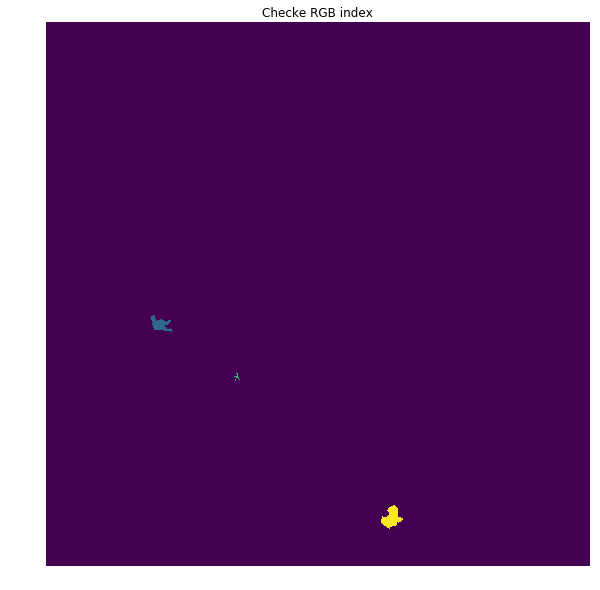

In [9]:
shapefile_path = ["C:/Users/samrari/ComputBuffer/Image/Sen2/S2A_OPER_PRD_MSIL1C_PDMC_20161101T012450_R101_V20161031T230902_20161031T230902.SAFE/Mask/ROI_RangeDepth_SameBoTy.shp"]
FilePath = 'C:/Users/samrari/ComputBuffer/Image/Sen2/S2A_OPER_PRD_MSIL1C_PDMC_20161101T012450_R101_V20161031T230902_20161031T230902.SAFE/'

labeled_pixels = vectors_to_raster(shapefile_path, rows, cols, geo_transform,
                                   proj)
    
plt.figure(figsize=(10, 10))
plt.imshow(label(labeled_pixels))
plt.title('Checke RGB index')
plt.axis('off')
for i in np.unique(labeled_pixels):
    print('Occurence of label {0: d} : {1: d}'.format(i, np.sum(labeled_pixels == i)))


Occurence of label  0 :  120365817
Occurence of label  1 :  75003
Occurence of label  2 :  6003
Occurence of label  3 :  113577


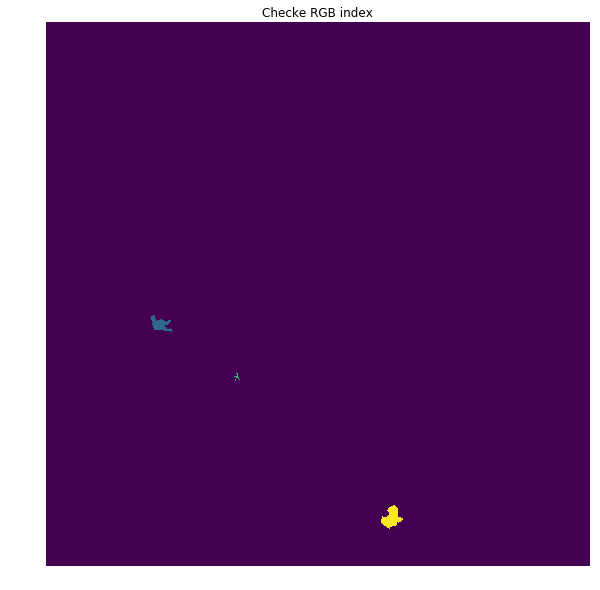

In [10]:
plt.figure(figsize=(10, 10))
labeled_pixels = label(labeled_pixels)
plt.imshow(labeled_pixels)
plt.title('Checke RGB index')
plt.axis('off')

for i in np.unique(labeled_pixels):
    print('Occurence of label {0: d} : {1: d}'.format(i, np.sum(labeled_pixels == i)))


In [11]:
FootprintFilePath = 'C:/Users/samrari/ComputBuffer/Image/Sen2/S2A_OPER_PRD_MSIL1C_PDMC_20161101T012450_R101_V20161031T230902_20161031T230902.SAFE/Footprint/'

FootPrint = []

for File in GetSimpleFiles("B02*.tif",directory=FootprintFilePath):
    print(File)
    FootPrint.append(gdal.Open( FootprintFilePath + File ) )
    
for i in range(len(FootPrint)):
    FootPrint[i] = (FootPrint[i].GetRasterBand(1).ReadAsArray().astype(np.uint8)==255).astype(bool)
    
FootPrintBoarders = np.full(FootPrint[0].shape[0:2] , False, dtype= bool)
# plt.figure(figsize=(20, 20))
for i in range(1,7):
    FootPrintBoarders[np.logical_and(FootPrint[i-1], FootPrint[i])] = True
    

B02_06.tif
B02_07.tif
B02_08.tif
B02_09.tif
B02_10.tif
B02_11.tif
B02_12.tif


<function matplotlib.pyplot.show>

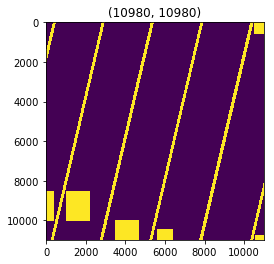

In [12]:
RasterWidth = bands_data.shape[0]
RasterHeight = bands_data.shape[1]
DeepSample = np.full((RasterWidth, RasterHeight) , False, dtype= bool)

DeepSample = gdal.Open( FilePath+'/Mask/'+'DeepSamples.tif')
DeepSample = DeepSample.GetRasterBand(1).ReadAsArray().astype(np.bool_)

SoilIndex = gdal.Open( FilePath+'/Mask/'+'10m.tif')
SoilIndex = SoilIndex.GetRasterBand(1).ReadAsArray().astype(np.bool_)
plt.imshow(SoilIndex)

plt.imshow(np.logical_or(DeepSample, FootPrintBoarders))
plt.title(DeepSample.shape)
plt.show

In [26]:
def get_X(DeepSample, FootPrint, SoilIndex, band_data):
    X = np.empty(bands_data.shape, dtype= np.float16)
    X.fill(np.nan)
    buffer = np.float16
    
    for i in range(len(FootPrint)):
        Idx = np.logical_and(FootPrint[i], ~SoilIndex, np.isnan(X[:,:,0]))
        
        if np.sum(Idx) > 0:
            IdxDeep = np.logical_and(FootPrint[i], DeepSample)
            
            for c in range(band_data.shape[2]):
                band_data[:,:,c][IN_Idx] = np.empty(1)
    return band_data

X = np.empty(bands_data.shape, dtype= np.float16)
X = get_X(DeepSample, FootPrint, SoilIndex, bands_data)

percentiles  5 ,  95  of band  0 :  0.0 ,  4.0 

percentiles  5 ,  95  of band  1 :  0.0 ,  5.0 

percentiles  5 ,  95  of band  2 :  0.0 ,  5.0 

percentiles  5 ,  95  of band  3 :  0.0 ,  4.0 

percentiles  5 ,  95  of band  4 :  0.0 ,  4.0 



(-0.5, 10979.5, 10979.5, -0.5)

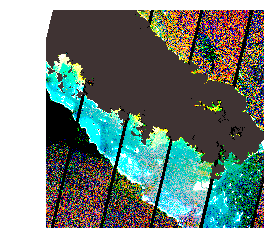

In [25]:
better_contrast = np.empty(bands_data.shape, dtype= bands_data.dtype)

p_min = 5
p_max = 95
for i in range(bands_data.shape[2]):
    v_min, v_max = np.percentile(X[:,:,i], (p_min, p_max))
    print('percentiles ',p_min,', ',p_max,' of band ',str(i),': ',str(v_min),', ',str(v_max),'\n')
    better_contrast[:,:,i] = exposure.rescale_intensity(X[:,:,i], in_range=(v_min, v_max))
   

plt.imshow(img_as_float(better_contrast[:,:,RGBIdx]))
plt.axis('off')
    

(-0.5, 10979.5, 10979.5, -0.5)

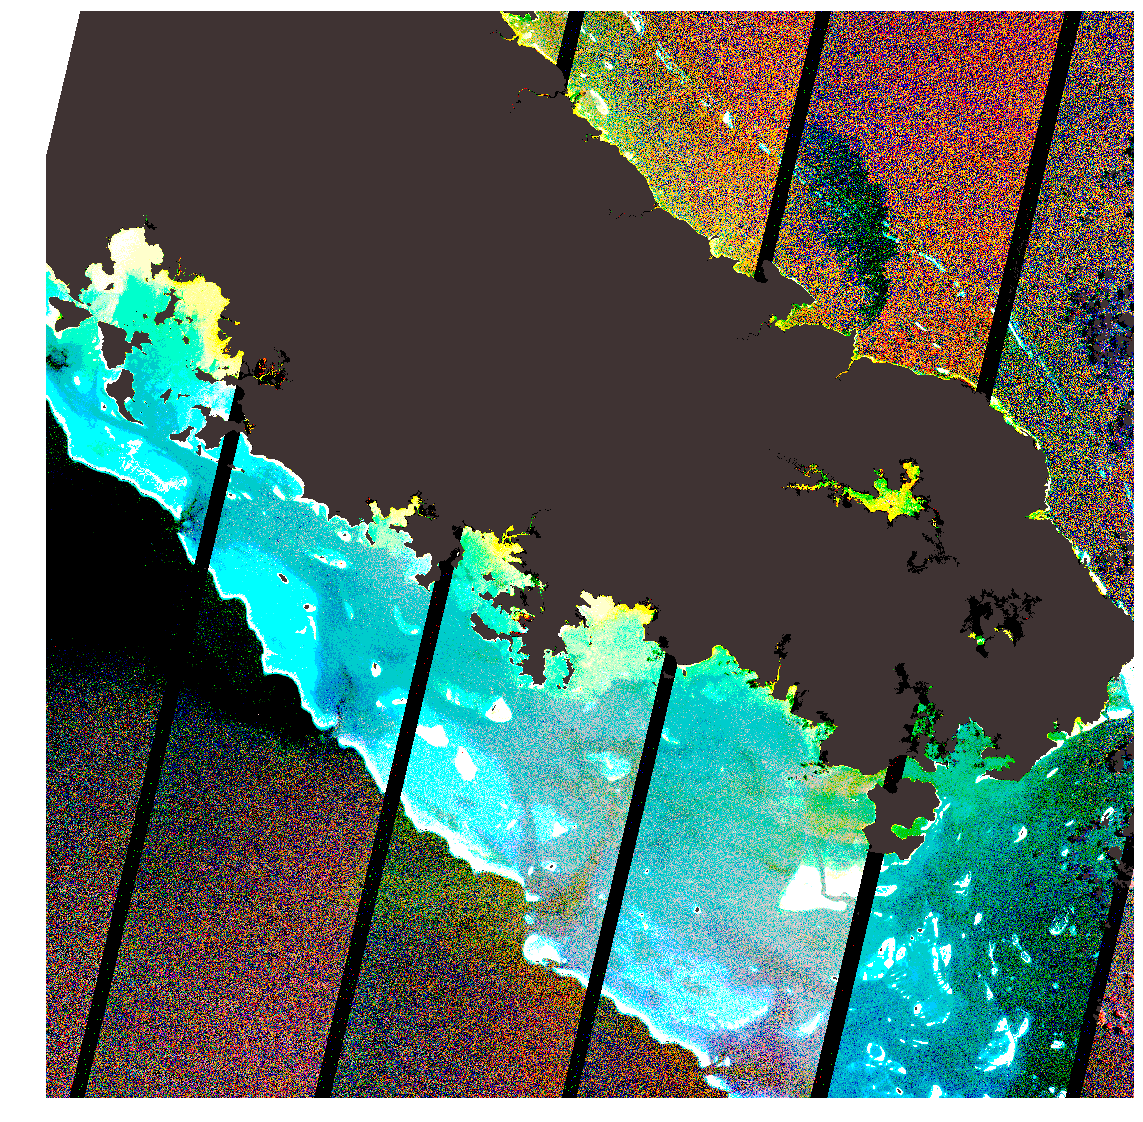

In [28]:
plt.figure(figsize=(20, 20))
plt.imshow(img_as_float(better_contrast[:,:,RGBIdx]))
plt.axis('off')

In [ ]:
I = bands_data[np.dstack((np.full((labeled_pixels.shape) , False, dtype= bool),\
                     labeled_pixels==2,\
                     np.full((10980, 10980, 3) , False, dtype= bool)))]
J = bands_data[np.dstack((np.full((10980, 10980, 2) , False, dtype= bool),\
                     labeled_pixels==2,\
                     np.full((10980, 10980, 2) , False, dtype= bool)))]
assert (I.shape == (J.shape))

In [ ]:
np.cov(I,J, bias=1)[0,1]

In [ ]:
np.sqrt(4)

In [ ]:
train_data_path = "C:/Users/samrari/ComputBuffer/Image/Sen2/S2A_OPER_PRD_MSIL1C_PDMC_20161101T012450_R101_V20161031T230902_20161031T230902.SAFE/Mask"
FilePath = 'C:/Users/samrari/ComputBuffer/Image/Sen2/S2A_OPER_PRD_MSIL1C_PDMC_20161101T012450_R101_V20161031T230902_20161031T230902.SAFE/'

SoilMask = gdal.Open( FilePath+'/Mask/'+'10m.tif')
SoilIndex = SoilMask.GetRasterBand(1).ReadAsArray().astype(np.bool_)
del SoilMask


In [ ]:
%whos